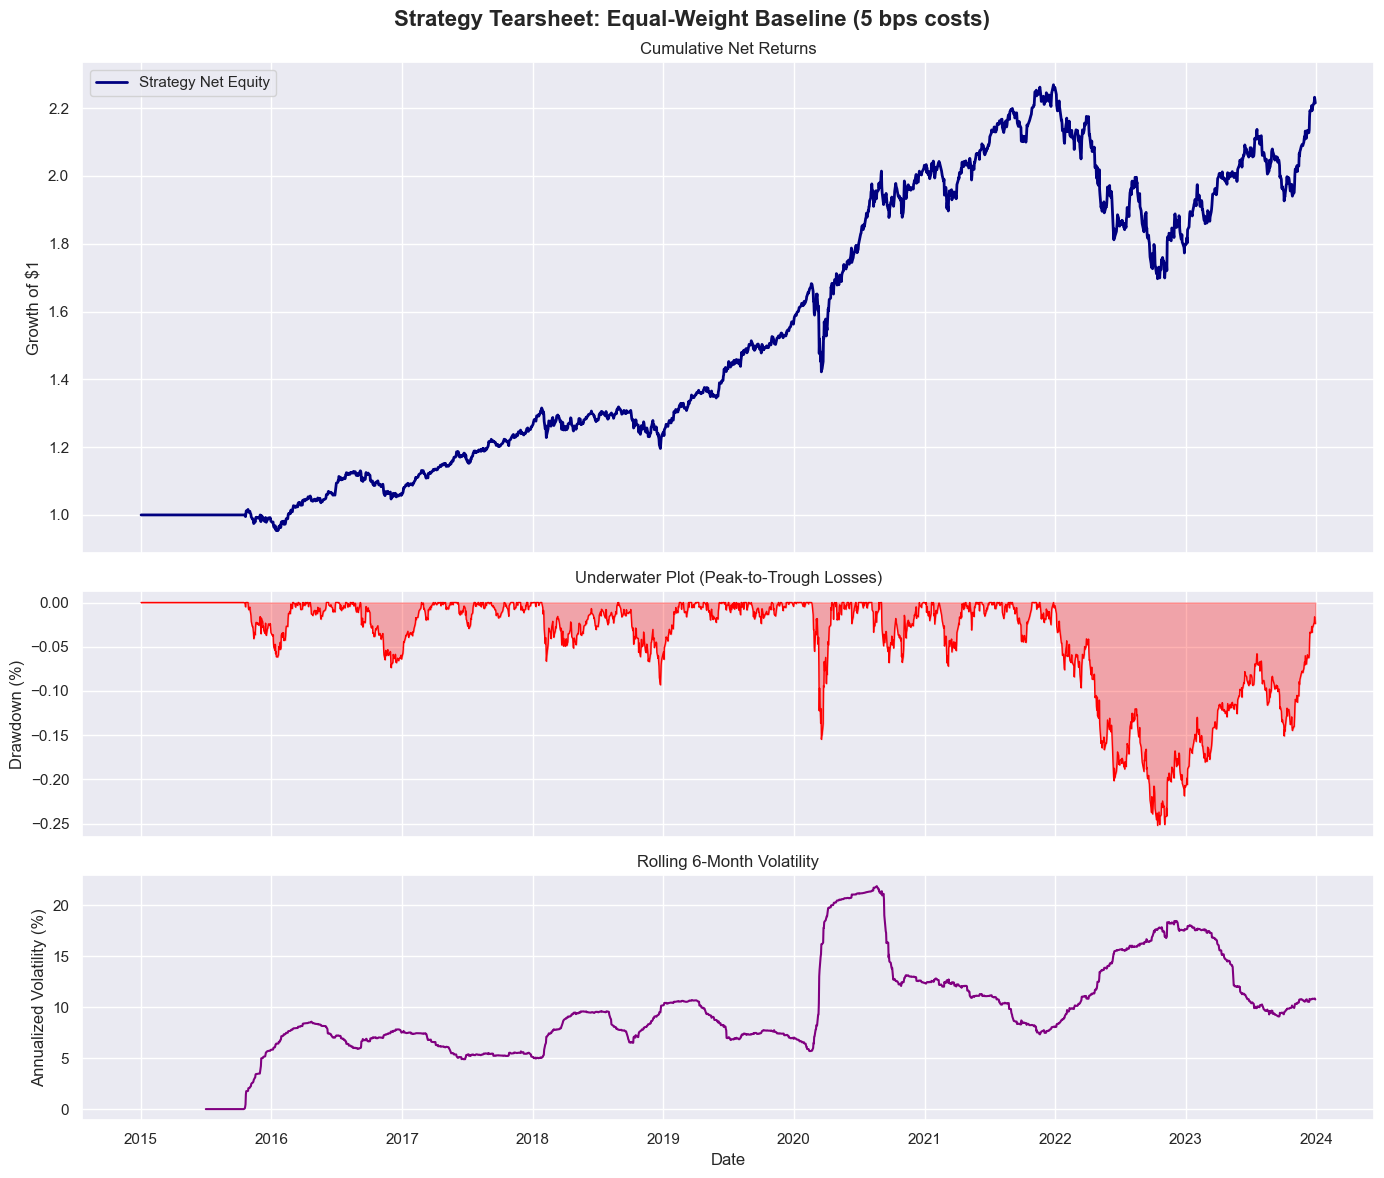

Worst Drawdown: -25.22%
Ending Equity:  $221,482.10


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Professional styling
sns.set_theme(style="darkgrid")

# 1. Load the results generated by the M4 Backtest Engine
results = pd.read_parquet("../data/reports/backtest_results.parquet")

# 2. Calculate the "Underwater Curve" (Drawdown)
# A drawdown is the percentage loss from the highest peak the equity curve has reached.
running_max = results['cumulative_net'].cummax()
drawdown = (results['cumulative_net'] - running_max) / running_max

# Calculate Rolling 6-Month (126 trading days) Annualized Volatility
rolling_vol = results['net_ret'].rolling(window=126).std() * np.sqrt(252) * 100

# 3. Create the multi-panel Tearsheet
fig, axes = plt.subplots(3, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1, 1]}, sharex=True)
fig.suptitle('Strategy Tearsheet: Equal-Weight Baseline (5 bps costs)', fontsize=16, fontweight='bold')

# --- Panel 1: Cumulative Equity Curve ---
axes[0].plot(results.index, results['cumulative_net'], color='navy', linewidth=2, label='Strategy Net Equity')
axes[0].set_ylabel('Growth of $1')
axes[0].set_title('Cumulative Net Returns')
axes[0].legend(loc='upper left')

# --- Panel 2: The Underwater Plot (Drawdowns) ---
axes[1].fill_between(drawdown.index, drawdown, 0, color='red', alpha=0.3)
axes[1].plot(drawdown.index, drawdown, color='red', linewidth=1)
axes[1].set_ylabel('Drawdown (%)')
axes[1].set_title('Underwater Plot (Peak-to-Trough Losses)')

# --- Panel 3: Rolling Volatility ---
axes[2].plot(rolling_vol.index, rolling_vol, color='purple', linewidth=1.5)
axes[2].set_ylabel('Annualized Volatility (%)')
axes[2].set_xlabel('Date')
axes[2].set_title('Rolling 6-Month Volatility')

plt.tight_layout()
plt.show()

# Print Summary Statistics below the chart
max_drawdown = drawdown.min() * 100
print(f"Worst Drawdown: {max_drawdown:.2f}%")
print(f"Ending Equity:  ${results['equity'].iloc[-1]:,.2f}")